## T1 INF1761
#### Lucca Buffara de Almeida 
#### Matricula: 1521018


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Dado spectral para XYZ
def specToXYZ(betha, Lw, x_, y_, z_):
    XYZ = [0,0,0]
    XYZ[0] = np.sum(x_ * betha * Lw)
    XYZ[1] = np.sum(y_ * betha * Lw)
    XYZ[2] = np.sum(z_ * betha * Lw)
        
    return XYZ

#converte xyz para srgb
def XYZ_sRGB(XYZ):
    
    R = XYZ[0] *  3.2406 + XYZ[1] * -1.5372 + XYZ[2] * -0.4986
    G = XYZ[0] * -0.9689 + XYZ[1] *  1.8758 + XYZ[2] *  0.0415
    B = XYZ[0] *  0.0557 + XYZ[1] * -0.2040 + XYZ[2] *  1.0570
    
    if R > 0.0031308:
        R = 1.055 * ( pow(R, 1/2.4)) - 0.055
    else:
        R = 12.92 * R
    
    if G > 0.0031308:
        G = 1.055 * ( pow(G, 1/2.4)) - 0.055
    else:
        G = 12.92 * G
        
    if B > 0.0031308:
        B = 1.055 * ( pow(B, 1/2.4)) - 0.055
    else:
        B = 12.92 * B
        
    return [R,G,B]
    
#converte XYZ pra LAB usando reference white D65
#CIE 2
def XYZ_LAB(XYZ):
    
    LAB = [0,0,0]
    
    var_X = XYZ[0] / 0.95047
    var_Y = XYZ[1] / 1.0
    var_Z = XYZ[2] / 1.08883
    
    if var_X > 0.008856:
        var_X = pow(var_X,(1/3))
    else:
        var_X = ( 7.787 * var_X ) + ( 16 / 116 )
        
    if var_Y > 0.008856:
        var_Y = pow(var_Y, (1/3))
    else:
        var_Y = ( 7.787 * var_Y ) + ( 16 / 116 )
        
    if var_Z > 0.008856:
        var_Z = pow(var_Z, (1/3))
    else:
        var_Z = ( 7.787 * var_Z ) + ( 16 / 116 )
        
    LAB[0] = ( 116 * var_Y ) - 16
    LAB[1] = 500 * ( var_X - var_Y )
    LAB[2] = 200 * ( var_Y - var_Z )
    
    return LAB
    
    

In [3]:
def gera_beta(delta):
    betha = np.zeros((401))
    for i in range(delta):
        betha[i] = 1.0
    for i in range(delta, 401):
        betha[i] = 0.0
    return betha


def computeGamutPoints(iluminante='D65'):
    
    df = pd.read_excel("all_1nm_data.xls", header=3)
    
    if iluminante == 'D65':
        Lw = df['CIE D65']
    else:
        Lw = df['CIE A']
        
    x_ = df["x bar"]
    y_ = df["y bar"]
    z_ = df["z bar"]
    
    Lw = Lw[80:481]
    x_ = x_[80:481]
    y_ = y_[80:481]
    z_ = z_[80:481]
        
    x_ = np.asarray(x_)
    y_ = np.asarray(y_)
    z_ = np.asarray(z_)
    Lw = np.asarray(Lw)
    
    k = 1.0/np.sum(y_ * Lw)
    Lw = Lw * k
    
    XYZPoints = [[0,0,0]]
    LABPoints = [[0,0,0]]
    sRGBPoints = [[0,0,0]]
    
    for delta in range(5,401):
        betha = gera_beta(delta)
        for i in range(0,401):
            betha = np.roll(betha,1)
            XYZ = specToXYZ(betha, Lw, x_, y_, z_)
            sRGB = XYZ_sRGB(XYZ)
            LAB = XYZ_LAB(XYZ)
            XYZPoints.append(XYZ)
            sRGBPoints.append(sRGB)
            LABPoints.append(LAB)

    return np.array(XYZPoints), np.array(sRGBPoints), np.array(LABPoints)
            
def draw(X,Y,Z, rgb,Xlabel, Ylabel, Zlabel):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(X,Y,Z, color=rgb)
    ax.set_xlabel(Xlabel)
    ax.set_ylabel(Ylabel)
    ax.set_zlabel(Zlabel)
    plt.show()

def clamp(x, xmin=0.0, xmax=1.0):
    if x < xmin:
        return xmin
    elif x > xmax:
        return xmax
    else:
        return x

In [4]:
#Usa iluminante D65
XYZArray, sRGBArray, LABArray = computeGamutPoints(iluminante='D65')

#Usa iluminante A
XYZArray_A, sRGBArray_A, LABArray_A = computeGamutPoints(iluminante='A')

rgb = []

for i in range(len(sRGBArray)):
    red = clamp(sRGBArray[i][0])
    green = clamp(sRGBArray[i][1])
    blue = clamp(sRGBArray[i][2])
    rgb.append([red,green,blue])
rgb = np.array(rgb)


Gamut espaco XYZ


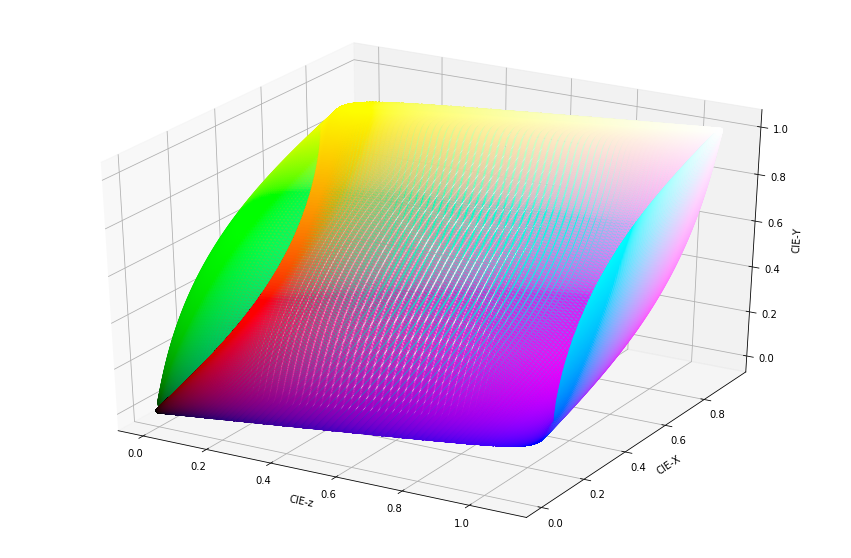

In [5]:
print("Gamut espaco XYZ")
draw(XYZArray[:,2], XYZArray[:,0],XYZArray[:,1], rgb, "CIE-z","CIE-X", "CIE-Y")

Gamut espaco LAB


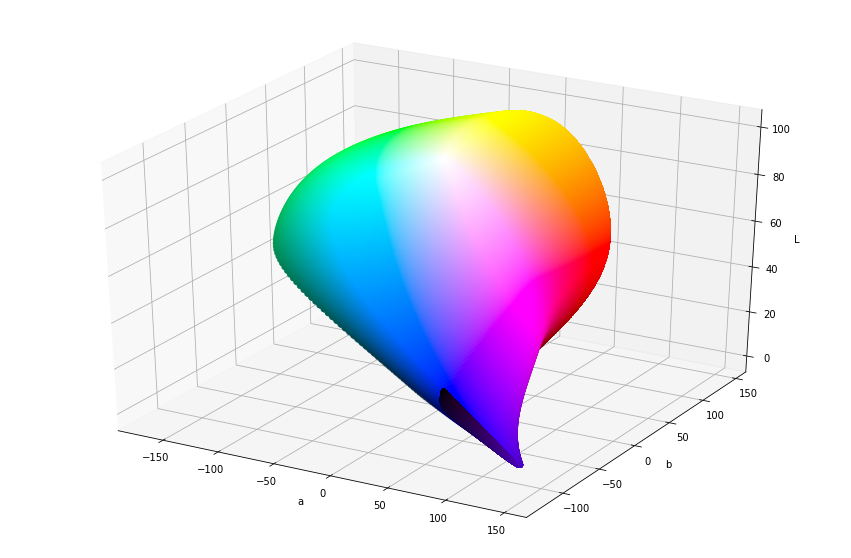

In [6]:
print("Gamut espaco LAB")
draw(LABArray[:,1], LABArray[:,2],LABArray[:,0], rgb, "a","b", "L")

Gamut espaco sRGB


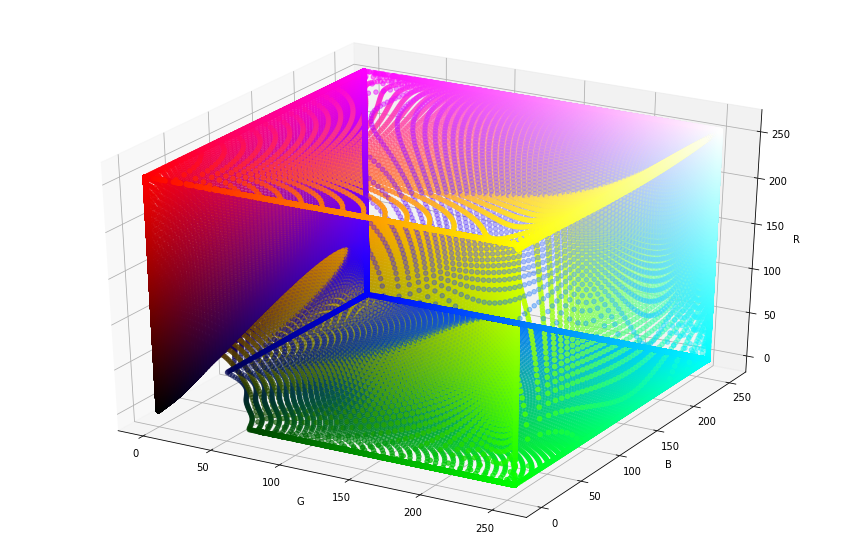

In [8]:
print("Gamut espaco sRGB")
#RGB em sRGB fica um cubo
draw(rgb[:,1]*255, rgb[:,2]*255,rgb[:,0]*255, rgb, "G","B", "R")
